In [1]:
# All good User Cases
path_good_US = "../dataset/en/all.txt"
# Bad User Cases generated by OnePoint (with Markovify)
path_bad_US = "../dataset/en/generated_bad_us_en.txt"

In [3]:
import spacy

#nlp = spacy.load("en_core_web_sm") #This one does not have 'true' word embeddings
#nlp = spacy.load("en_core_web_md") # good word embedding
nlp = spacy.load("en_vectors_web_lg") # better word embedding including 1 million word vectors
print(nlp) #1
doc = nlp("Berlin is a nice city")
print(doc)

# Iterate over tokens in a Doc
for token in doc:
    print(token.text, token.vector.shape)
    print(token.vector[:5])

Berlin is a nice city
Berlin (300,)
[0.243   0.11444 0.36875 0.2368  0.57666]
is (300,)
[-0.084961   0.502      0.0023823 -0.16755    0.30721  ]
a (300,)
[ 0.043798  0.024779 -0.20937   0.49745   0.36019 ]
nice (300,)
[-0.1857    0.14146  -0.44419  -0.010602  0.067374]
city (300,)
[ 0.82606 -0.1439  -0.1139  -0.58773  0.36067]


In [10]:
import numpy as np
#print(doc, len(doc))
#print(doc[0], len(doc[0].vector))

def compute_similarity_matrix(doc):
    # init matrix that will contain the similarities between words in the sentence
    similarity_mat = np.zeros((len(doc),len(doc)))

    # Iterate over tokens in a Doc
    i = j = 0
    for tokeni in doc:
        for tokenj in doc:
            #print(tokeni.text, tokenj.text, tokeni.similarity(tokenj))
            similarity_mat[i,j] = tokeni.similarity(tokenj)
            j += 1
        i += 1
        j = 0
    #print(similarity_mat)   
    return similarity_mat  


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

def plot_similarity_matrix(doc, similarity_mat):
    fig, ax = plt.subplots()
    im = ax.imshow(similarity_mat)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(doc)))
    ax.set_yticks(np.arange(len(doc)))
    # ... and label them with the respective list entries
    ax.set_xticklabels([str(token) for token in doc])
    ax.set_yticklabels([str(token) for token in doc])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(doc)):
        for j in range(len(doc)):
            text = ax.text(j, i, "%.2f"%similarity_mat[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Similarity of words inside a sentence")
    fig.tight_layout()
    plt.show()

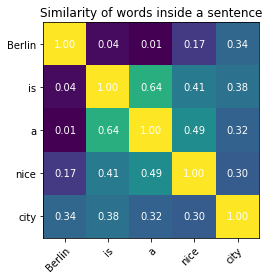

[[1.         0.03530751 0.00707189 0.17396966 0.33599561]
 [0.03530751 1.         0.63504684 0.41206613 0.38044041]
 [0.00707189 0.63504684 1.         0.48994875 0.31792676]
 [0.17396966 0.41206613 0.48994875 1.         0.29513782]
 [0.33599561 0.38044041 0.31792676 0.29513782 1.        ]]


In [6]:
# Compute similarity matrix for a simple sentence example
doc = nlp("Berlin is a nice city")
similarity_mat = compute_similarity_matrix(doc)
plot_similarity_matrix(doc, similarity_mat)
print(similarity_mat) 

In [7]:
data_good = []
with open(path_good_US) as inputfile:
    for line in inputfile:
        data_good.append(line.strip())
for elt in data_good[:5]:
    print(elt)

﻿As a Data user, I want to have the 12-19-2017 deletions processed.
As a UI designer, I want to redesign the Resources page, so that it matches the new Broker design styles.
As a UI designer, I want to report to the Agencies about user testing, so that they are aware of their contributions to making Broker a better UX.
As a UI designer, I want to move on to round 2 of DABS or FABS landing page edits, so that I can get approvals from leadership.
As a UI designer, I want to move on to round 2 of Homepage edits, so that I can get approvals from leadership.


### some useful info from documentation
Models that come with built-in word vectors make them available as the Token.vector attribute. Doc.vector and Span.vector will default to an average of their token vectors. You can also check if a token has a vector assigned, and get the L2 norm, which can be used to normalize vectors.
https://spacy.io/usage/spacy-101

The words “dog”, “cat” and “banana” are all pretty common in English, so they’re part of the model’s vocabulary, and come with a vector. The word “afskfsd” on the other hand is a lot less common and out-of-vocabulary – so its vector representation consists of 300 dimensions of 0, which means it’s practically nonexistent. If your application will benefit from a large vocabulary with more vectors, you should consider using one of the larger models or loading in a full vector package, for example, en_vectors_web_lg, which includes over 1 million unique vectors.
https://spacy.io/models/en-starters#en_vectors_web_lg

In [25]:
import numpy as np
#print(doc, len(doc))
#print(doc[0], len(doc[0].vector))

def compute_similarity_matrix_check_token(doc):
    # init matrix that will contain the similarities between words in the sentence
    similarity_mat = np.zeros((len(doc),len(doc)))

    # Iterate over tokens in a Doc
    i = j = 0
    for tokeni in doc:
        for tokenj in doc:
            print(tokeni.text, tokenj.text, tokeni.similarity(tokenj))
            print(tokeni.vector_norm, tokenj.vector_norm)
            print("---")
            print(tokeni.lower_, tokenj.lower_, tokeni.lower_.similarity(tokenj.lower_))
            print(tokeni.lower.vector_norm, tokenj.lower.vector_norm)
            print("------")
            similarity_mat[i,j] = tokeni.similarity(tokenj)
            j += 1
        i += 1
        j = 0
    #print(similarity_mat)   
    return similarity_mat 

In [36]:
# Compute similarity matrix for a sentence from good US corpus
doc = nlp(data_good[0])
print(doc[0])
print(doc[0].has_vector)
#print(doc[0].lower) #int
print(doc[0].lower_)
print(doc[0].lower_.has_vector)

#print(doc[0].lower.text) # does not work (.lower is an int and not a str)
print(doc[0].vector_norm)
#print(doc[0].lower.vector_norm) # does not work: "'int' object has no attribute 'vector_norm'"
print(doc[0].lower_.vector_norm) # does not work: "'str' object has no attribute 'vector_norm'"


﻿As
False
﻿as


AttributeError: 'str' object has no attribute 'has_vector'

In [18]:
data_bad = []
with open(path_bad_US) as inputfile:
    for line in inputfile:
        data_bad.append(line.strip())
for elt in data_bad[:5]:
    print(elt)

I want to always keep the database up-to-date over time.
I want to deploy a new version of the UI SME, so that my data as well as the study proceeds.
I want to know whether the data loaded from historical FABS loader to include records for externally held data complete, so that I can know what the first hypothesis is, so that I can work in question.
I want to sign up for a meeting or information that is strongly branded, so that I can better prepare them and the type of forms to the editor, so that we have a singular provenance, or assembly a collection curator, I want to search for images of cells using standard meta data to my needs.
I want to view lists on the priority list.


/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship 

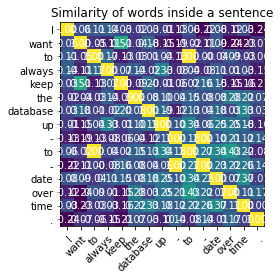

In [19]:
# Compute similarity matrix for a sentence from bad US corpus
doc = nlp(data_bad[0])
similarity_mat = compute_similarity_matrix(doc)
#print(similarity_mat)
plot_similarity_matrix(doc, similarity_mat)